In [4]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingRegressor
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
epsilons = [0.01, 0.1, 0.3, 0.5, 1, 2, 5, 10]


leaves_dp, internal_nodes_dp = [], []
for epsilon in epsilons:
    tmp_nodes = []
    tmp_leaves = []
    for _ in range(10):
        # only adding epsilon_dp_internal_nodes
        clf = HistGradientBoostingRegressor(max_bins=255, epsilon_dp_internal_nodes=epsilon).fit(X, y)
        tmp_nodes.append(clf.score(X,y))
        # only adding epsilon_dp_leaves
        clf = HistGradientBoostingRegressor(max_bins=255, epsilon_dp_leaves=epsilon).fit(X, y)
        tmp_leaves.append(clf.score(X,y))
    internal_nodes_dp.append(np.mean(tmp_nodes))
    leaves_dp.append(np.mean(tmp_leaves))
print(leaves_dp)
print(internal_nodes_dp)

[-34980619.12903418, -46.32397387042139, 0.8680272241210508, 0.9372721739050129, 0.9687769215786682, 0.9750075728977754, 0.9781382744933212, 0.9785408764933115]
[0.9606259109825087, 0.9616414484773056, 0.9624513645332445, 0.9630124520046286, 0.9633272812561394, 0.9663537218831266, 0.9683242680062596, 0.9701086544127376]


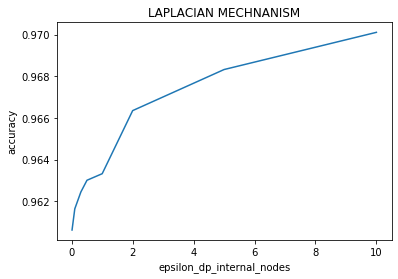

In [11]:
plt.plot(*[tuple(epsilons), tuple(internal_nodes_dp)])
plt.title("LAPLACIAN MECHNANISM")
plt.xlabel('epsilon_dp_internal_nodes')
plt.ylabel('accuracy')
plt.show()

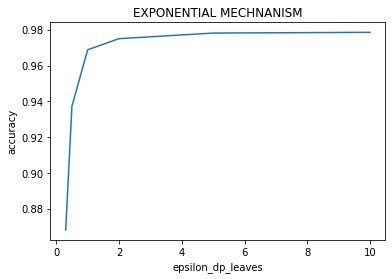

In [12]:
plt.plot(*[tuple(epsilons[2:]), tuple(leaves_dp[2:])])
plt.title("EXPONENTIAL MECHNANISM")
plt.xlabel('epsilon_dp_leaves')
plt.ylabel('accuracy')
plt.show()